In [35]:
import pandas as pd
from matplotlib import pyplot as plt

# Analysing sensitivity of arb profit based on amm trade size

We will take a look at how different trade sizes impact the profit generated from an arbitrage transaction, with the objective of obtaining the optimal trade size. We will take note of the absolute profit generated as well as the profit margin. 

In [82]:
# Setting up the amm

class AMM:
    def __init__(self,x,y,nav_price):
        self.x = x
        self.y = y
        self.k = x * y
        self.nav = nav_price
        self.price_in_x = self.price(True,self.x,self.y)
        self.price_in_y = self.price(False,self.x,self.y)
    def price(self,in_x,x,y):
        if in_x:
            return y / x
        else:
            return x / y

    def trade(self,price):
        new_x =  (self.k*price) ** 0.5
        new_y = (self.k/price) ** 0.5
        new_spot_price = self.price(False,new_x,new_y)
        y_in =  new_y - self.y
        x_out = new_x - self.x
        execution_price  = x_out / y_in
        eth_to_mint_y_in =  y_in * self.nav
        profit = abs(x_out) -  eth_to_mint_y_in
        profit_pct = profit/ eth_to_mint_y_in
        price_impact = (x_out*self.price_in_x)/y_in -1
        return {'new_spot_price':price,'execution_price': execution_price,'profit':profit,'profit_margin':profit_pct}


amm_1 = AMM(10000,100000,0.05)
results_array = []

for i in range(99,1,-1):
    result = amm_1.trade(i/1000)
    results_array.append(result)

df = pd.DataFrame(results_array)
print(df)
print(df.iloc[df['profit'].idxmax()])

    new_spot_price  execution_price        profit  profit_margin
0            0.099        -0.099499     24.936553       0.989975
1            0.098        -0.098995     49.742341       0.979899
2            0.097        -0.098489     74.411373       0.969772
3            0.096        -0.097980     98.937398       0.959592
4            0.095        -0.097468    123.313895       0.949359
..             ...              ...           ...            ...
93           0.006        -0.024495  -7861.904266      -0.510102
94           0.005        -0.022361  -9596.747752      -0.552786
95           0.004        -0.020000 -12000.000000      -0.600000
96           0.003        -0.017321 -15599.564267      -0.653590
97           0.002        -0.014142 -21769.552622      -0.717157

[98 rows x 4 columns]
new_spot_price       0.050000
execution_price     -0.070711
profit             857.864376
profit_margin        0.414214
Name: 49, dtype: float64


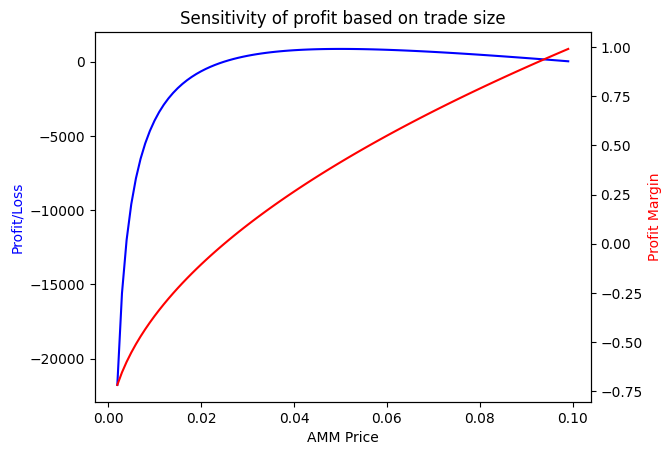

In [75]:
fig, ax = plt.subplots()
plt.title('Sensitivity of profit based on trade size')
ax.plot(df['new_spot_price'],df['profit'],color='blue')
ax.set_xlabel('AMM Price')
ax.set_ylabel("Profit/Loss",color='blue')
ax2 = ax.twinx()
ax2.plot(df['new_spot_price'],df['profit_margin'],color='red')
ax2.set_ylabel('Profit Margin',color='red')
plt.show()